# Analyse en composantes principales #
## I) Introduction ##
Principal component analysis (PCA) est un outil qui permet de trouver des relations importantes dans les données et de rajouter des features plus importantes.

Cette méthode d'analyse de données consiste à transformer des variables qui sont corrélées en nouvelles variables décorrélées les unes des autres. Ces nouvelles variables sont nommées <strong>composantes principales</strong>. Elle permet de réduire le nombre de variables et de rendre l'information moins redondante.

## II) Les données

## III) Setup
Run la cellule suivante pour setup le système, importer les données et les standardiser

In [131]:
# Setup system
import pandas as pd
import numpy as np

from sklearn.feature_selection import mutual_info_regression
from sklearn.decomposition import PCA
from sklearn import preprocessing as prepro

# Import data
df = pd.read_csv("Automobile_data.csv")

# Standardize
df.dropna()

df = df[df["normalized-losses"] != "?"]
le = prepro.LabelEncoder()

le.fit(df.price)
df.price = le.transform(df.price)

le.fit(df.horsepower)
df.horsepower = le.transform(df.horsepower)

## IV) Choisir les features 
Pour choisir les features, il faut prendre celles qui ont une forte correlation avec la target (`Price` ici)

In [85]:
# Complete with 4 features 

features = [
    #...,
    #...,
    #...,
    #...,
]

In [ ]:
#IV_solution() #un exemple de solution

## V) Standardiser
Les données des features ne sont pas forcément sur la même échelle par défautl. Il faut donc les standardiser.

<strong>Code :</strong>
```python
X = df.copy()
y = X.pop(~~target~~)
X = X.loc[:, features]

# Standardize with same scale
X_scaled = (X - X.mean(axis=0)) / X.std(axis=0)

```

In [141]:
# à completer ici pour passer les données sur la même échelle

In [143]:
#V_solution() #solution

## VI) Composantes principales

On peut maintenant à l'aide de la fonction ```fit_transform``` de ```scikit-learn's``` calculer les composantes principales des données sélectionnées.

In [144]:
# Create principal components
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Convert to dataframe
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)

X_pca.head() 

,PC1,PC2,PC3,PC4
0,0.399491,-1.663393,0.097344,-0.126416
1,1.967130,-0.816074,-0.460339,-0.143930
2,1.835322,-1.015616,-0.005821,0.007853
3,2.202958,-0.344582,-0.874640,0.301558
4,0.556250,-1.717534,-0.009193,-0.054153


TODO explication loadings

In [113]:
# Create loadings
loadings = pd.DataFrame(
    pca.components_.T,    #transpose the matrix of loading
    columns=component_names,    # columns are principal components
    index=X.columns,    # rows are original features
)

loadings

,PC1,PC2,PC3,PC4
highway-mpg,-0.532996,0.069264,0.800762,0.264382
engine-size,0.529329,0.374257,0.507392,-0.567711
horsepower,-0.331804,0.893787,-0.301570,0.010320
curb-weight,0.570642,0.237231,0.101927,0.779551


TODO explication visualisation

array([<AxesSubplot:title={'center':'% Explained Variance'}, xlabel='Component'>,
       <AxesSubplot:title={'center':'% Cumulative Variance'}, xlabel='Component'>],
      dtype=object)

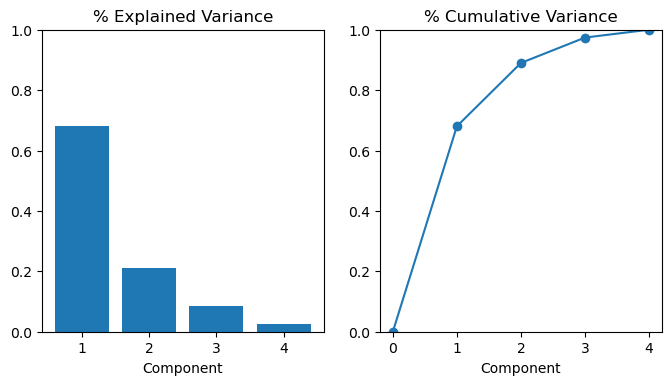

In [145]:
plot_variance(pca)

In [138]:
def IV_solution():
    print("# IV Solution : \n")
    print("features = [\"highway-mpg\", \"engine-size\", \"horsepower\", \"curb-weight\"]\n")
    print("print(\"Correlation with Price:\")")
    print("df[features].corrwith(df.price)")
    
IV_solution()

# IV Solution : 

features = ["highway-mpg", "engine-size", "horsepower", "curb-weight"]

print("Correlation with Price:")
df[features].corrwith(df.price)


In [137]:
def V_solution():
    print("# V Solution :\n")
    
    print("X = df.copy()")
    print("y = X.pop('price')")
    print("X = X.loc[:, features]\n")

    print("# Standardize with same scale")
    print("X_scaled = (X - X.mean(axis=0)) / X.std(axis=0)")

    print("X_scaled")
    
V_solution()

# V Solution :

X = df.copy()
y = X.pop('price')
X = X.loc[:, features]

# Standardize with same scale
X_scaled = (X - X.mean(axis=0)) / X.std(axis=0)
X_scaled
